In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Question 1

In [2]:
def vel_field1(x,y):
    r=np.sqrt(x*x+y*y)
    u=((x*x-y*y-1)*(x*x-y*y)+4*x*x*y*y)/(r**4)
    v=-2*x*y/(r**4)
    cond=r<1
    u[cond]=0
    v[cond]=0
    return u,v

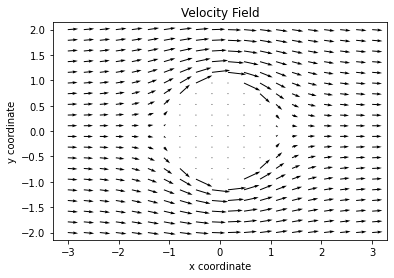

In [3]:
x, y = np.mgrid[-3:3:20j, -2:2:20j]
u,v=vel_field1(x,y)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Velocity Field');

In [4]:
def vel1(r,t):
    x=r[0]
    y=r[1]
    d=np.sqrt(x*x+y*y)
    if d<1:
        u=0
        v=0
    else:
        u=((x*x-y*y-1)*(x*x-y*y)+4*x*x*y*y)/(d**4)
        v=-2*x*y/(d**4)
    return np.array([u,v])

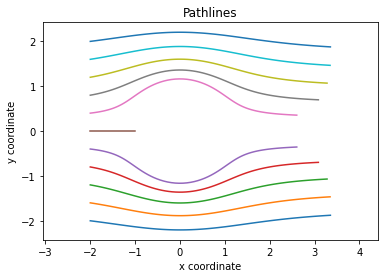

In [5]:
times=np.linspace(0,5,100)
for i in range(11):
    ic=np.array([-2,-2+0.4*i])
    sol=odeint(vel1,ic,times)
    sx,sy=sol.T
    plt.plot(sx,sy)
plt.axis('equal')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Pathlines');

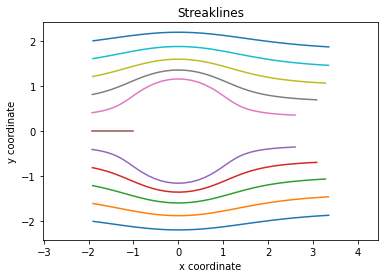

In [6]:
for j in range(11):
    ic = np.array([-2,-2+0.4*j])
    dt = 0.1
    n = 50
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel1, ic, [start, T])
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
plt.axis('equal')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Streaklines');

In [7]:
def vel_stream1(r,t,t0):
    x=r[0]
    y=r[1]
    d=np.sqrt(x*x+y*y)
    if d<1:
        u=0
        v=0
    else:
        u=((x*x-y*y-1)*(x*x-y*y)+4*x*x*y*y)/(d**4)
        v=-2*x*y/(d**4)
    return np.array([u,v])

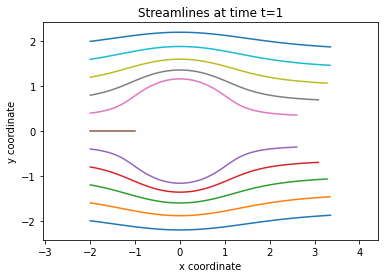

In [8]:
times=np.linspace(0,5,100)
for i in range(11):
    ic=np.array([-2,-2+0.4*i])
    sol=odeint(vel_stream1,ic,times,args=(1,))
    sx,sy=sol.T
    plt.plot(sx,sy)
plt.axis('equal')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Streamlines at time t=1');

### Conclusion
Therefore we can see that this is a steady flow as the streamline, streakline and pathlines are the same and don't change with time. Also this flow looks that around a spherical or cylindrical obstruction

# Question 2

In [9]:
def vel_field2(x,y,t):
    x_dash=x+t
    r=np.sqrt(x_dash*x_dash+y*y)
    u=-(x_dash*x_dash-y*y)/r**4
    v=-2*x_dash*y/r**4
    cond=r<1
    u[cond]=0
    v[cond]=0
    return u,v

C:\Users\MAYANK\AppData\Local\Temp/ipykernel_22456/365665881.py:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(3)


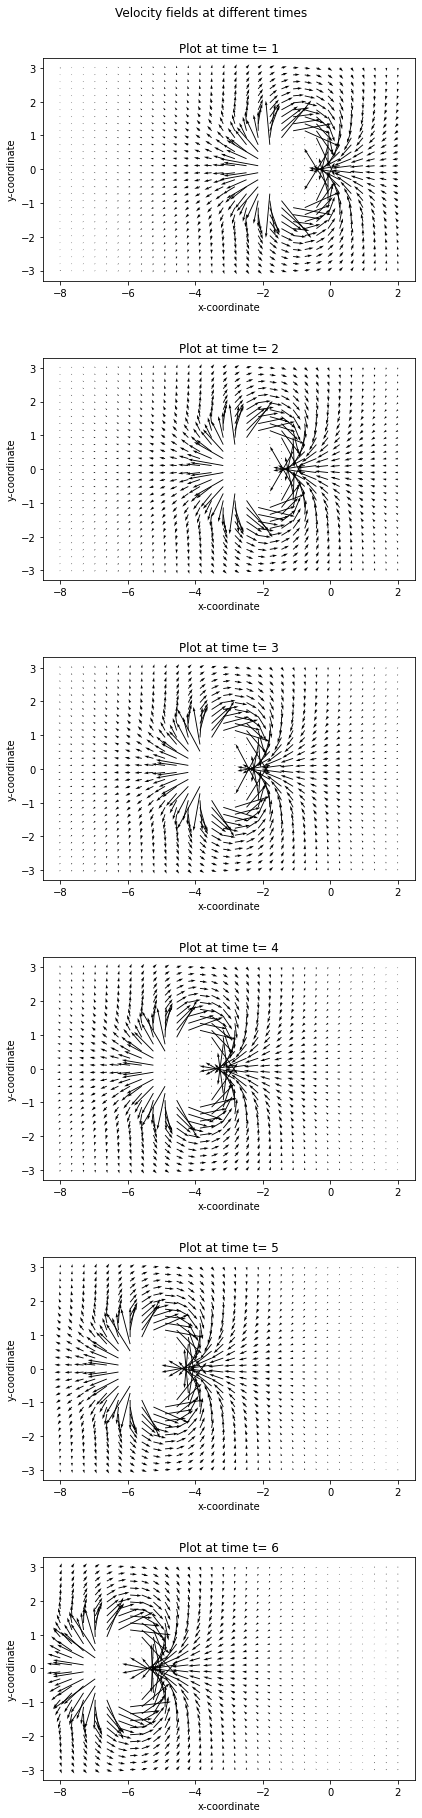

In [10]:
x,y=np.mgrid[-8:2:30j,-3:3:30j]
plt.subplots(figsize=(6.5, 26))
plt.suptitle('Velocity fields at different times')
for i in range(6):
    u,v=vel_field2(x,y,i+1)
    plt.subplot(6,1,i+1)
    plt.quiver(x,y,u,v)
    plt.axis('equal')
    plt.title("Plot at time t= "+ str(i+1))
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
plt.tight_layout(3)

In [11]:
def vel2(r,t):
    x=r[0]+t
    y=r[1]
    d=np.sqrt(x*x+y*y)
    if d<1:
        u=0
        v=0
    else:
        u=-(x*x-y*y)/d**4
        v=-2*x*y/d**4
    return np.array([u,v])

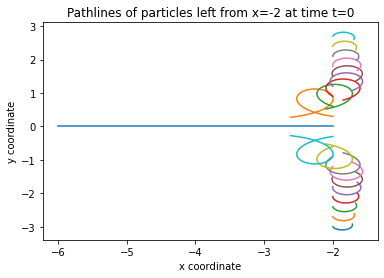

In [12]:
time=np.linspace(0,5,1000)
for i in range(20):
    ic=np.array([-2,-3+0.3*i])
    sol=odeint(vel2,ic,time)
    sx,sy=sol.T
    plt.plot(sx,sy)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Pathlines of particles left from x=-2 at time t=0');

C:\Users\MAYANK\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


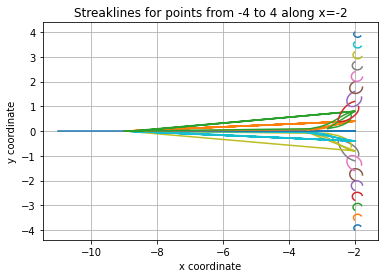

In [13]:
for j in range(21):
    ic = np.array([-2,-4+0.4*j])
    dt = 0.1
    n = 100
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel2, ic, [start, T])
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Streaklines for points from -4 to 4 along x=-2');

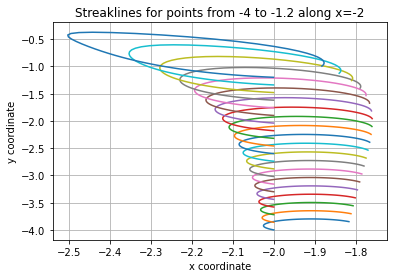

In [14]:
for j in range(21):
    ic = np.array([-2,-4+0.14*j])
    dt = 0.1
    n = 100
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel2, ic, [start, T])
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Streaklines for points from -4 to -1.2 along x=-2');

In [15]:
def vel_stream(r,t,t0):
    x=r[0]+t0
    y=r[1]
    d=np.sqrt(x*x+y*y)
    if d<1:
        u=0
        v=0
    else:
        u=-(x*x-y*y)/d**4
        v=-2*x*y/d**4
    return np.array([u,v])

C:\Users\MAYANK\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\MAYANK\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\MAYANK\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\MAYANK\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


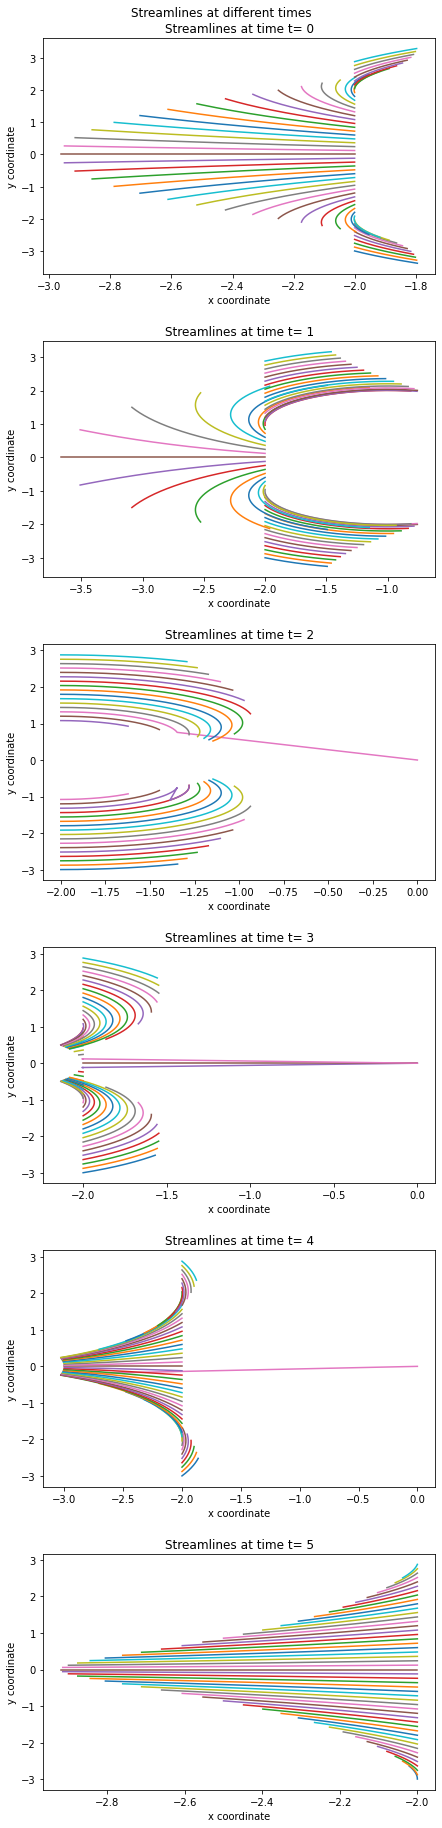

In [16]:
time=np.linspace(0,6,1000)
x,y=np.mgrid[-8:2:30j,-3:3:30j]
plt.subplots(figsize=(6.5, 26))
plt.suptitle('Streamlines at different times')
for i in range(6):
    for j in range(50):
        ic=np.array([-2,-3+0.12*j])
        sol=odeint(vel_stream,ic,time,args=(i,))
        sx,sy=sol.T
        plt.subplot(6,1,i+1)
        plt.plot(sx,sy)
        plt.title('Streamlines at time t= ' + str(i))
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
plt.tight_layout(2);

### Conclusion:
The flow is an unsteady flow probably depicting a moving vortex. The warnings thrown along the way is mainly due to few of the points where there is sudden spikes in velocities which leads to bad plots at these points